In [79]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [137]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from patsy import dmatrices
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

%matplotlib inline


In [81]:
# load the data
bankloans = pd.read_csv( 'C:\\Users\\hp\\Desktop\\Data Science\\ML\\Logistic Regression\\Logistic Regression files\\1. Case Study - Bank Loans\\bankloans.csv' )

# EDA

In [82]:
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


In [83]:
bankloans.columns

Index([u'age', u'ed', u'employ', u'address', u'income', u'debtinc',
       u'creddebt', u'othdebt', u'default'],
      dtype='object')

In [84]:
bankloans.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [85]:
bankloans.shape

(850, 9)

In [86]:
ProfileReport(bankloans)

Number of variables,9
Number of observations,850
Total Missing (%),0.0%
Total size in memory,59.8 KiB
Average record size in memory,72.0 B
Numeric,9
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [87]:
# split the data into default is_null  and default value is_not_null
bankloans_existing = bankloans[bankloans.default.isnull()==0]
bankloans_new = bankloans[bankloans.default.isnull()==1]

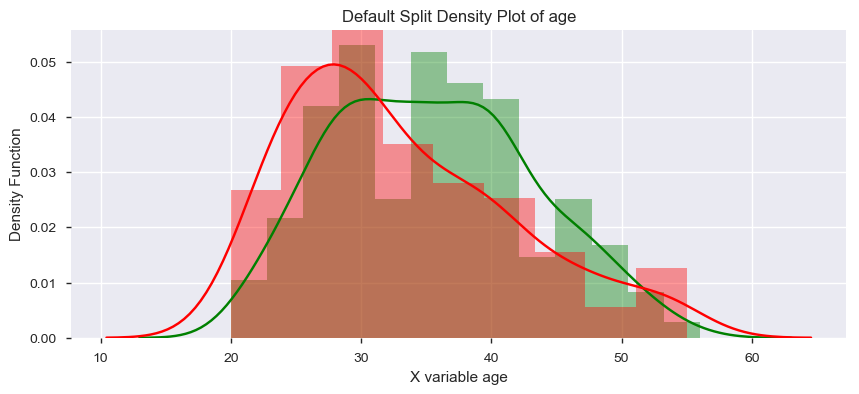

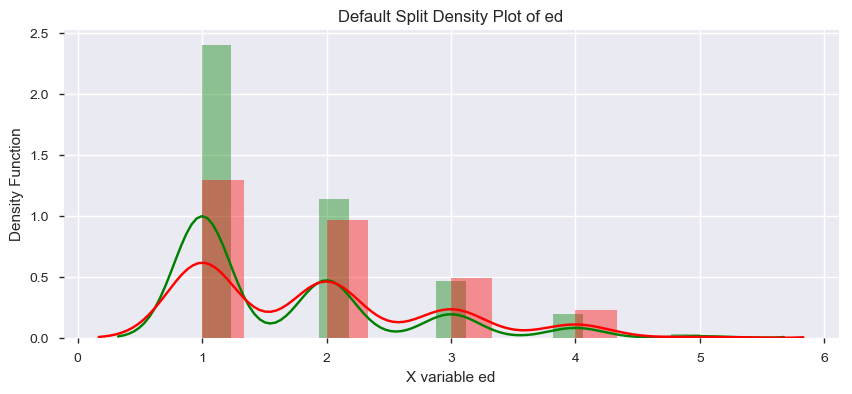

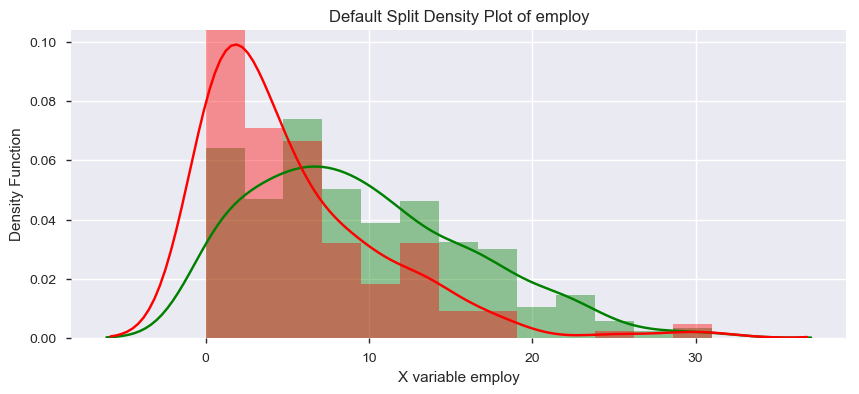

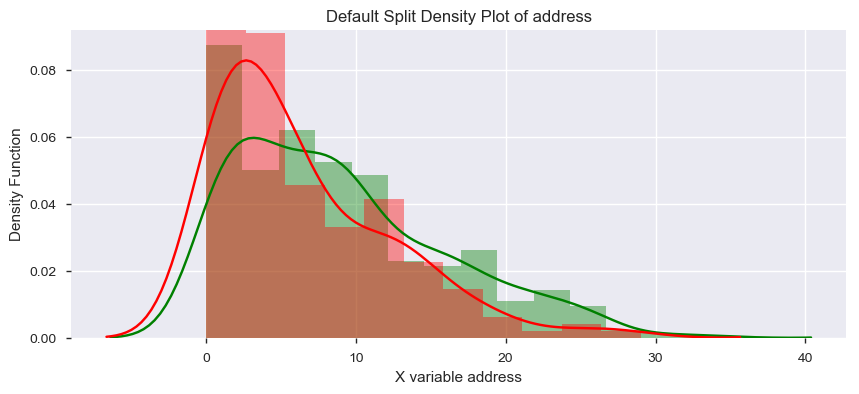

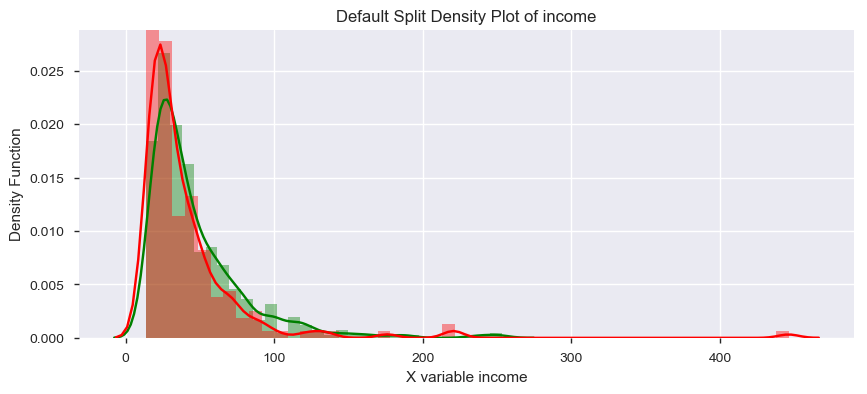

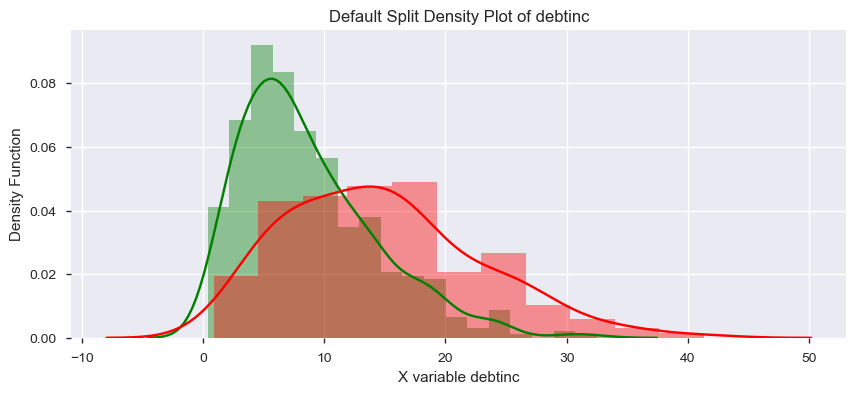

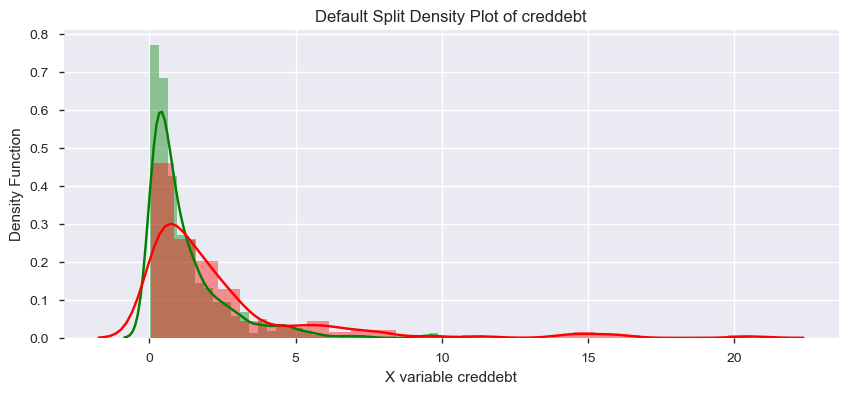

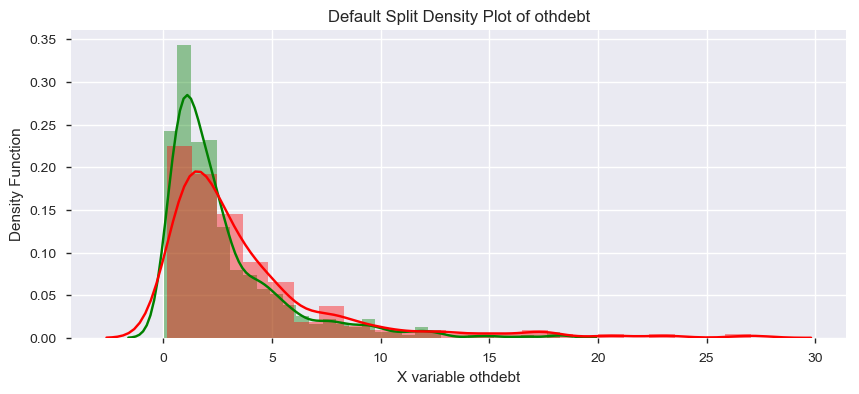

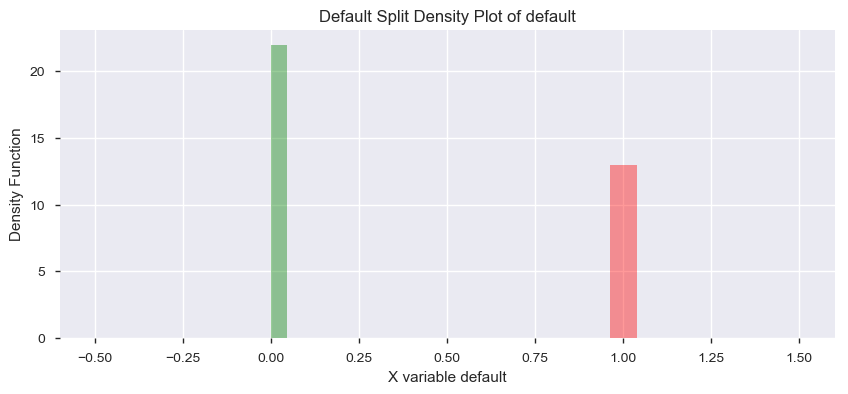

In [88]:
# Univariant Analysis - Histogram

for num_variable in bankloans_existing.columns:
    plt.subplots(figsize=(10,4))
    sns.distplot(bankloans_existing[bankloans_existing['default']==0][num_variable], label='Not Default', color='g', hist=True, norm_hist=False)
    sns.distplot(bankloans_existing[bankloans_existing['default']==1][num_variable], label='Default', color='r', hist=True, norm_hist=False)
    plt.xlabel(str("X variable ") + str(num_variable) )
    plt.ylabel('Density Function')
    plt.title(str('Default Split Density Plot of ')+str(num_variable))
   

In [89]:
bankloans_existing.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


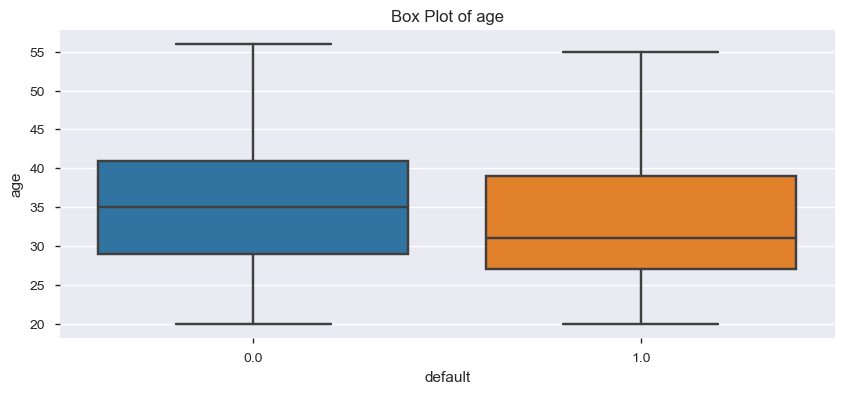

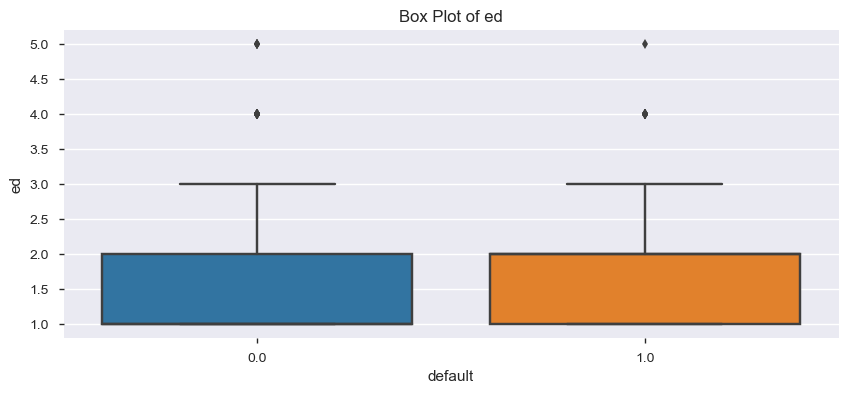

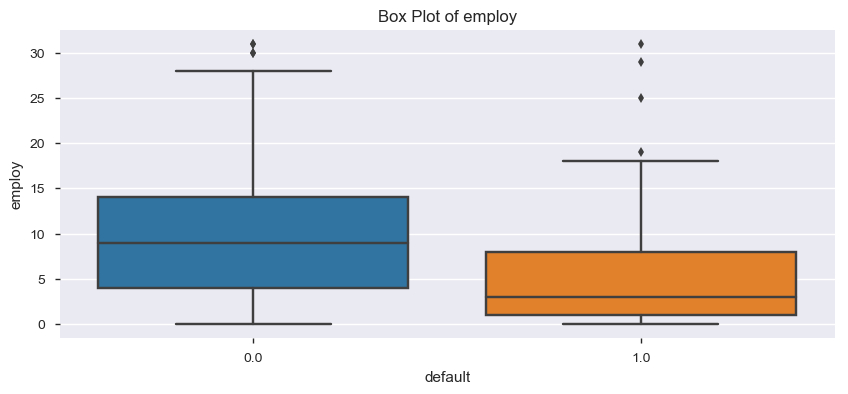

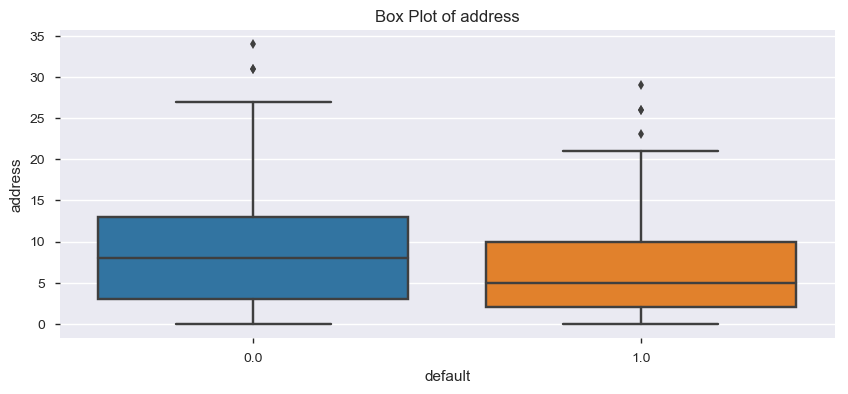

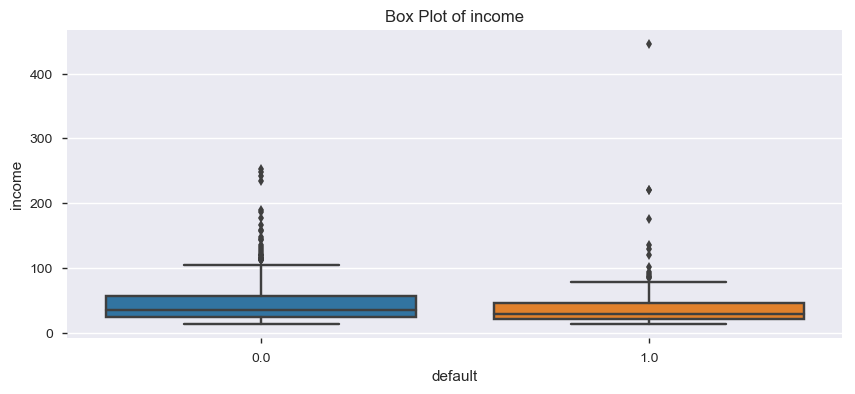

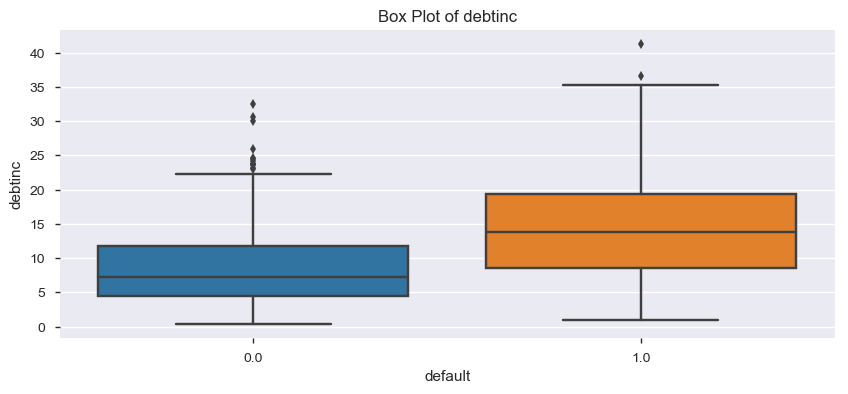

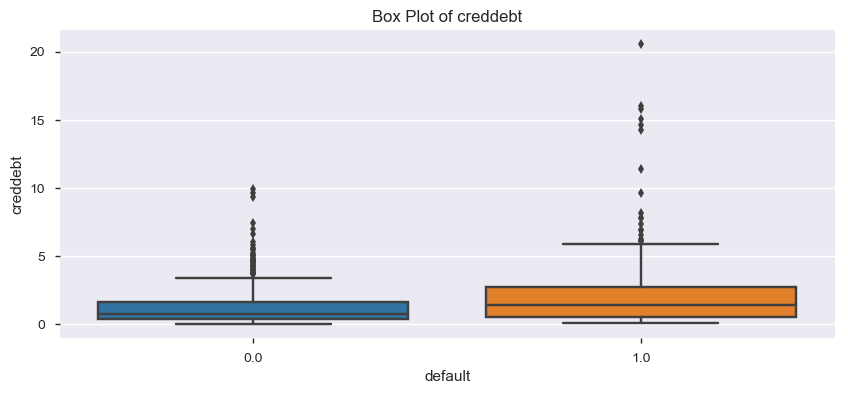

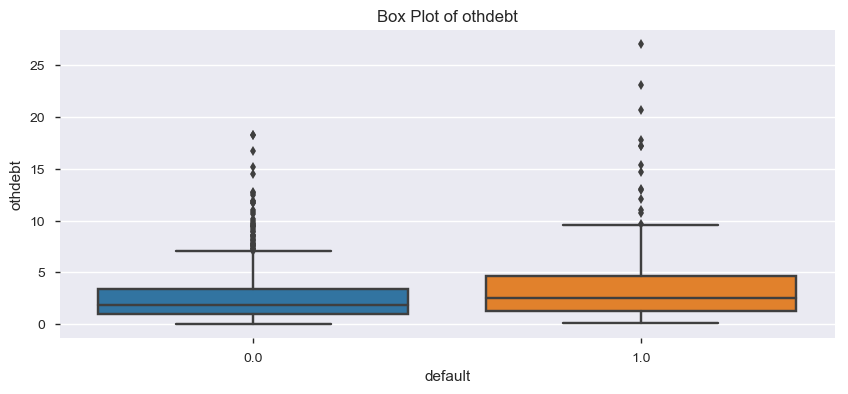

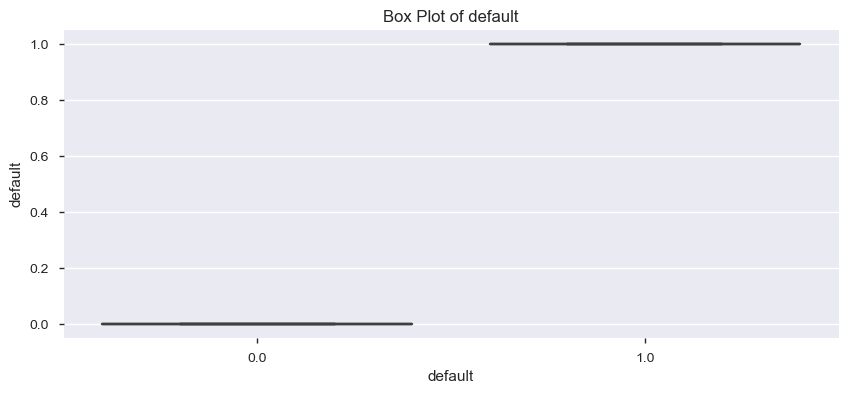

In [90]:
#Bivariant Analysis - BoxPlots
# Find Outliers and Importance of variables 
for num_variable in bankloans_existing.columns:
    plt.subplots(figsize=(10,4))
    sns.boxplot(x='default', y=num_variable, data = bankloans_existing)
    plt.title(str('Box Plot of ') + str(num_variable))
 

# Handling Missing values & Outliers

In [91]:
# missing value Treatment
# no missing value found for x variables

bankloans_existing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
age         700 non-null int64
ed          700 non-null int64
employ      700 non-null int64
address     700 non-null int64
income      700 non-null int64
debtinc     700 non-null float64
creddebt    700 non-null float64
othdebt     700 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 74.7 KB


In [92]:
# Outliers Treatments

def outlier_treatment(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    return x
    
    
bankloans_existing= bankloans_existing.apply(lambda x : outlier_treatment(x))    

In [93]:
bankloans_existing.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.847243,1.715714,8.358671,8.244386,44.848714,10.222153,1.498843,3.027290,0.261429
std,7.954735,0.906523,6.566008,6.721915,31.942133,6.682160,1.788451,3.115401,0.439727
min,21.000000,1.000000,0.000000,0.000000,15.000000,0.900000,0.030209,0.160936,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,53.010000,4.000000,27.010000,26.010000,190.300000,30.701000,9.891428,17.184744,1.000000


# Feature Engineering 

### Feature Transformation

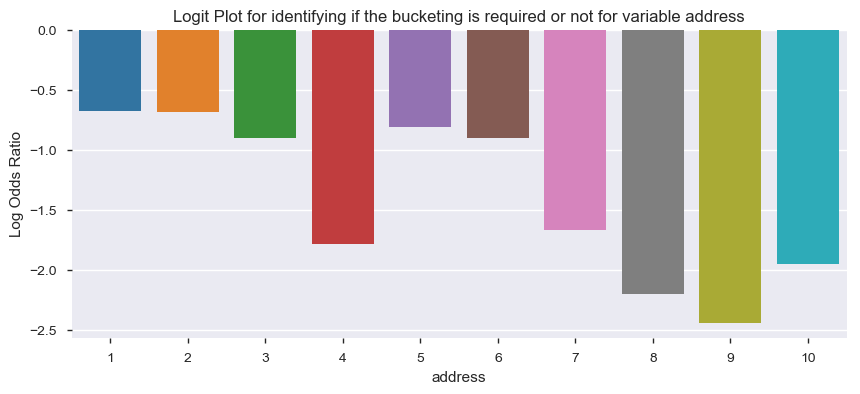

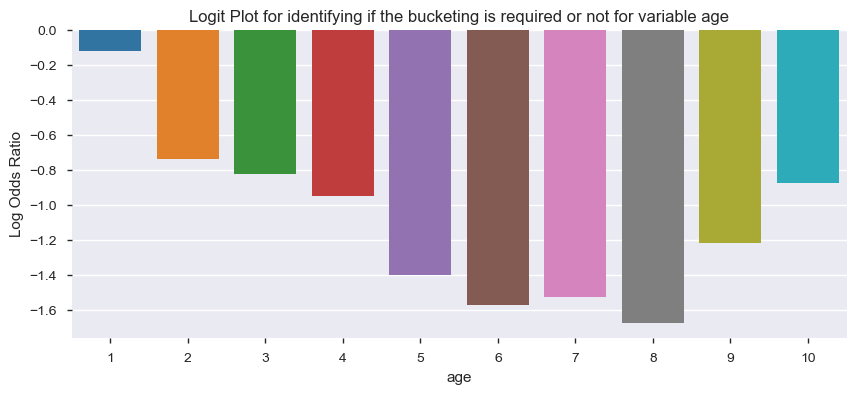

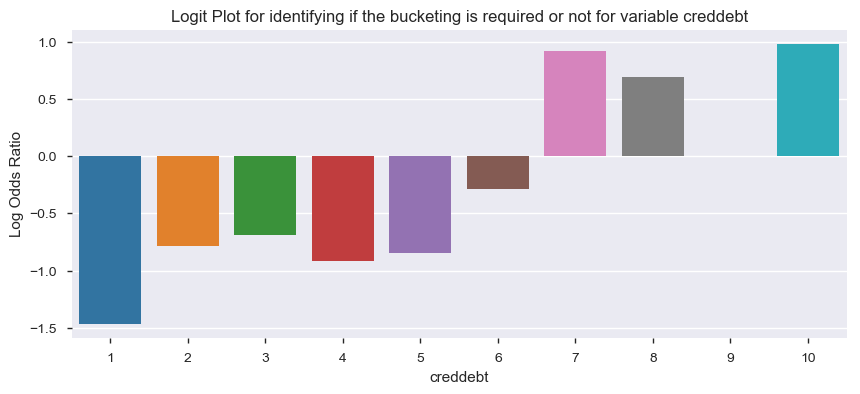

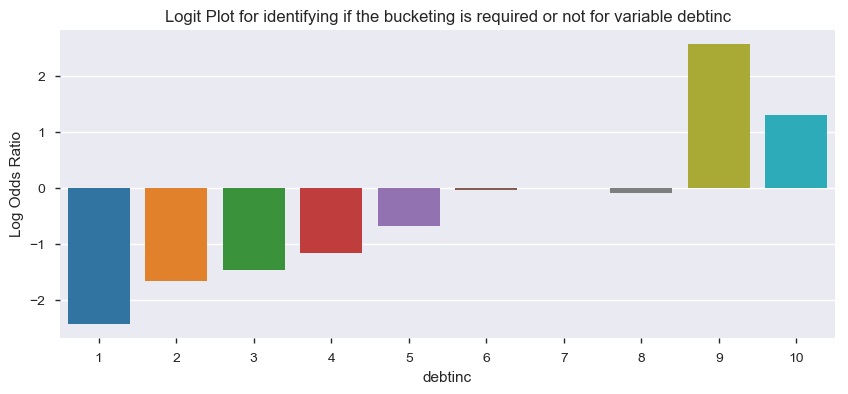

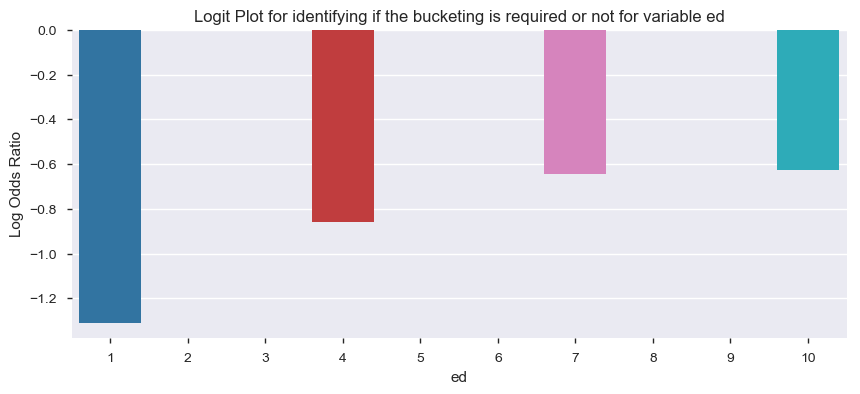

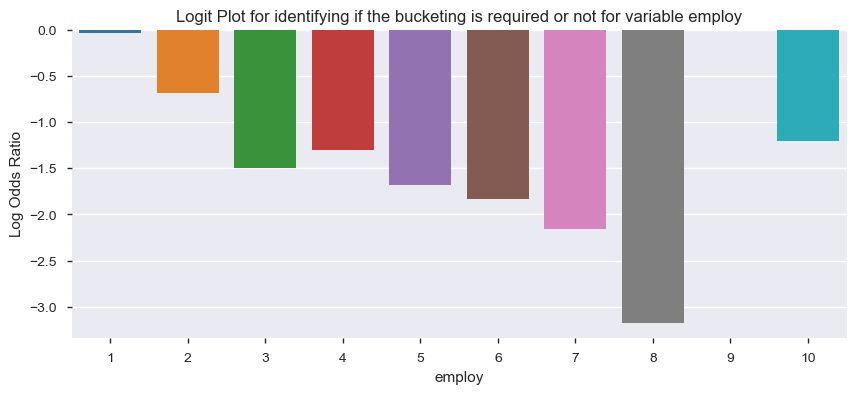

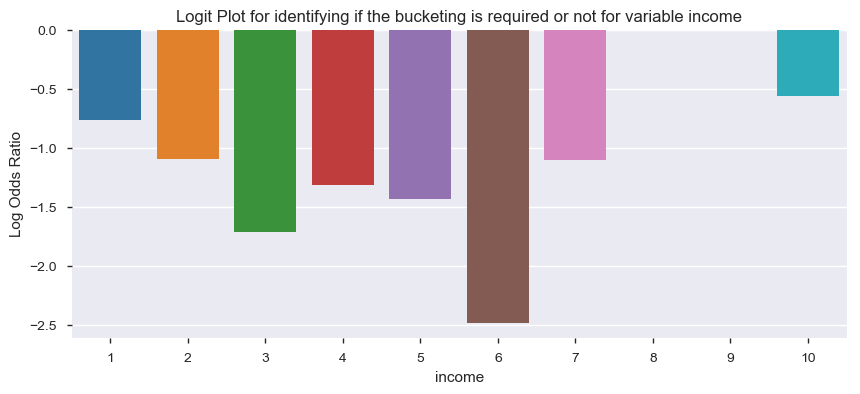

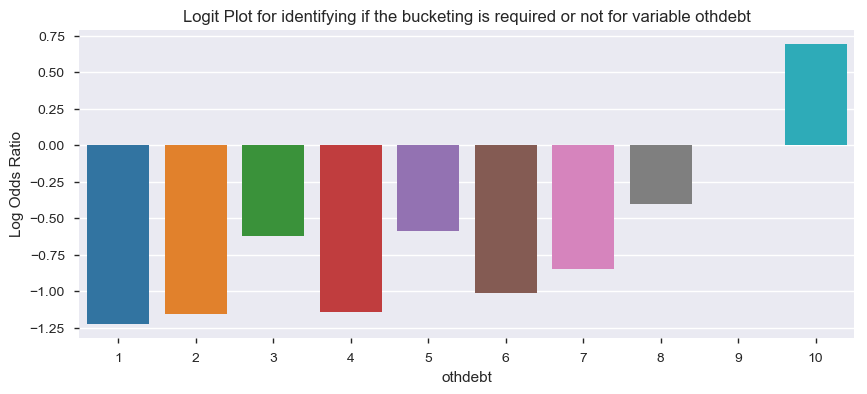

In [94]:

for num_variable in bankloans_existing.columns.difference(['default']):
    binned = pd.cut(bankloans_existing[num_variable], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    ser = bankloans_existing.groupby(binned)['default'].sum() / (bankloans_existing.groupby(binned)['default'].count()-bankloans_existing.groupby(binned)['default'].sum())
    ser = np.log(ser)
    plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
  

### Features Selection

In [95]:
# correlation - correlation matrix
bankloans_existing.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.016576,0.537417,0.596973,0.521450,0.016926,0.308318,0.348911,-0.138654
ed,0.016576,1.000000,-0.158071,0.055560,0.225395,0.009992,0.103012,0.156523,0.118521
employ,0.537417,-0.158071,1.000000,0.324859,0.665369,-0.035332,0.405959,0.419337,-0.287197
address,0.596973,0.055560,0.324859,1.000000,0.345067,0.014967,0.215397,0.234896,-0.165389
income,0.521450,0.225395,0.665369,0.345067,1.000000,-0.022541,0.553114,0.626787,-0.099553
debtinc,0.016926,0.009992,-0.035332,0.014967,-0.022541,1.000000,0.534602,0.603630,0.388556
creddebt,0.308318,0.103012,0.405959,0.215397,0.553114,0.534602,1.000000,0.639984,0.238179
othdebt,0.348911,0.156523,0.419337,0.234896,0.626787,0.603630,0.639984,1.000000,0.138962
default,-0.138654,0.118521,-0.287197,-0.165389,-0.099553,0.388556,0.238179,0.138962,1.000000


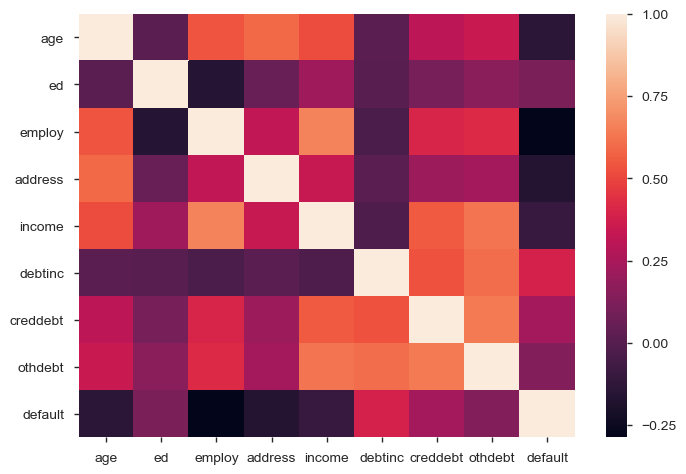

In [96]:
# correlation - Heatmap
sns.heatmap(bankloans_existing.corr())

In [97]:
# correlation _ VIF

X = pd.concat([bankloans_existing[bankloans_existing.columns.difference(['default'])],bankloans_existing['default']], axis=1)
features = "+".join(bankloans_existing.columns.difference(['default']))
X.head()

a,b = dmatrices(formula_like='default ~ '+ features, data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print vif


   VIF Factor   features
0   36.910987  Intercept
1    1.561802    address
2    2.037593        age
3    2.628899   creddebt
4    3.910509    debtinc
5    1.287345         ed
6    2.401544     employ
7    5.121585     income
8    4.562072    othdebt


In [98]:
# Numerical Variable - ttest
tstats_df = pd.DataFrame()
for num_variable in bankloans_existing.columns:
    tstats = stats.ttest_ind(bankloans_existing[bankloans_existing['default']==1][num_variable],bankloans_existing[bankloans_existing['default']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

  Variable Name T-Statistic      P-Value
0           age    -3.69893  0.000233527
1            ed     3.15351   0.00168236
2        employ    -7.92136  9.27995e-15
3       address    -4.43055  1.09104e-05
4        income    -2.64329   0.00839468
5       debtinc     11.1409  1.20241e-26
6      creddebt     6.47909   1.7428e-10
7       othdebt      3.7073  0.000226095
8       default         inf            0


In [99]:
# Somers
somersd_df = pd.DataFrame()
for num_variable in bankloans_existing.columns.difference(['default']):
    logreg = sm.logit(formula = str('default ~ ')+str(num_variable), data=bankloans_existing)
    result = logreg.fit()
    summ = result.summary()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(bankloans_existing['default'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.559856
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.501389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567774
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527166
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569055
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565619
         Iterations 5


,Variable Name,SomersD
0,address,0.222384
0,age,0.206329
0,creddebt,0.272378
0,debtinc,0.470506
0,ed,0.148302
0,employ,0.409138
0,income,0.200273
0,othdebt,0.173806


In [100]:
ProfileReport(bankloans_existing)

Number of variables,9
Number of observations,700
Total Missing (%),0.0%
Total size in memory,74.7 KiB
Average record size in memory,109.0 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


# Build Model

In [101]:
bankloans_existing.columns

Index([u'age', u'ed', u'employ', u'address', u'income', u'debtinc',
       u'creddebt', u'othdebt', u'default'],
      dtype='object')

In [102]:
# Split Train and Test Data

train_features = bankloans_existing.columns.difference(['default'])
train_x, test_x = train_test_split(bankloans_existing, test_size=0.3, random_state=45)



In [103]:
# build model
logreg=sm.logit(formula= 'default~'+ "+".join(train_features), data= train_x).fit()
summary= logreg.summary()
summary


Optimization terminated successfully.
         Current function value: 0.406317
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            8
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:                  0.3026
Time:                        22:30:03   Log-Likelihood:                -199.10
converged:                       True   LL-Null:                       -285.50
                                        LLR p-value:                 3.330e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8366      0.743     -2.473      0.013      -3.292      -0.381
address       -0.0916      0.026     -3.557      0.000      -0.142      -0.041
age            0.0546      0.021      2.647      0.008       0.014       0.095
creddebt       0.6397      0.132      4.846      0.000       0.381       0.898
debtinc        0.0517      0.038      1.350      0.177      -0.023       0.127
ed            -0.1088      0.150     -0.724      0.469      -0.403       0.185
employ        -0.2769      0.040     -6.993      0.000      -0.354      -0.199
income        -0.0029      0.012     -0.243      0.808      -0.026       0.020
othdebt        0.0813      0.101      0.805      0.421      -0.117       0.279
==============================================================================
"""

In [104]:
bankloans_existing.columns

Index([u'age', u'ed', u'employ', u'address', u'income', u'debtinc',
       u'creddebt', u'othdebt', u'default'],
      dtype='object')

In [107]:
# Remove ed and recreate model
train_features = bankloans_existing.columns.difference(['default','ed'])
#train_features = bankloans_existing.columns.difference(['default'])
train_x_new, test_x_new = train_test_split(bankloans_existing, test_size=0.3, random_state=42)
logreg=sm.logit(formula= 'default~'+ "+".join(train_features), data= train_x_new).fit()
summary= logreg.summary()
summary


Optimization terminated successfully.
         Current function value: 0.425394
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:                  0.2749
Time:                        22:30:28   Log-Likelihood:                -208.44
converged:                       True   LL-Null:                       -287.47
                                        LLR p-value:                 8.215e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3701      0.691     -1.983      0.047      -2.724      -0.016
address       -0.0852      0.026     -3.311      0.001      -0.136      -0.035
age            0.0388      0.020      1.923      0.054      -0.001       0.078
creddebt       0.6412      0.138      4.631      0.000       0.370       0.913
debtinc        0.0352      0.039      0.905      0.365      -0.041       0.112
employ        -0.2657      0.038     -7.038      0.000      -0.340      -0.192
income        -0.0087      0.012     -0.725      0.469      -0.032       0.015
othdebt        0.1253      0.102      1.232      0.218      -0.074       0.325
==============================================================================
"""

### find the cut - off

In [108]:
train_predicted_prob = pd.DataFrame(logreg.predict(train_x))
train_predicted_prob.columns = ['prob']
train_actual = train_x['default']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()


,actual,prob
57,0.0,0.006840
103,0.0,0.002402
180,0.0,0.028063
227,0.0,0.166615
603,0.0,0.047775


In [109]:
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = (train_temp['tp'].sum()) / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = (train_temp['tn'].sum()) / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)
    

In [110]:
roc_like_df.head()

,cutoff,sensitivity,specificity
0,0.000000,1.000000,0.000000
0,0.020408,0.992424,0.203911
0,0.040816,0.984848,0.315642
0,0.061224,0.969697,0.385475
0,0.081633,0.946970,0.449721


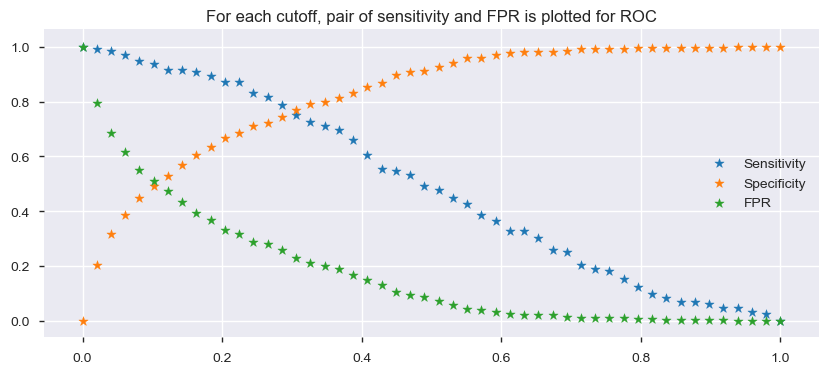

In [111]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [112]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.22449,0.871212,0.684358,1.55557


In [113]:
# gini value

train_gini = 2*metrics.roc_auc_score(train_x['default'], logreg.predict(train_x)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

('The Gini Index for the model built on the Train Data is : ', 0.7013712544438802)


# Model Validation

In [114]:
#Accuracy - Heat map

test_predicted_prob = pd.DataFrame(logreg.predict(test_x))
test_predicted_prob.columns = ['prob']
test_actual = test_x['default']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
418,1.0,0.810875
51,0.0,0.553158
331,1.0,0.203437
101,0.0,0.121012
410,0.0,0.001293


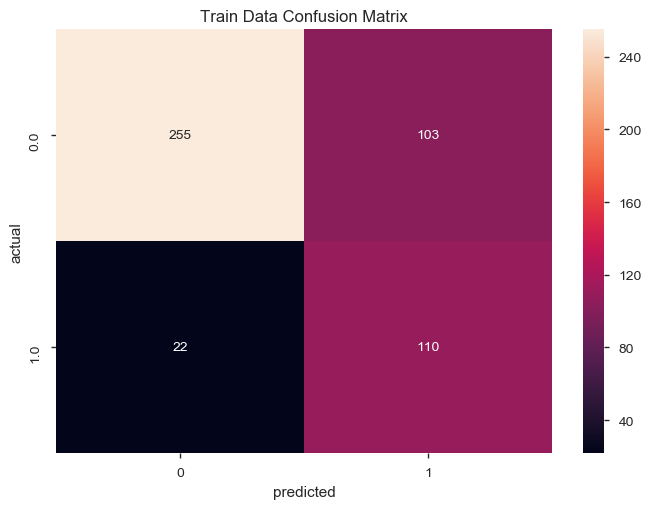

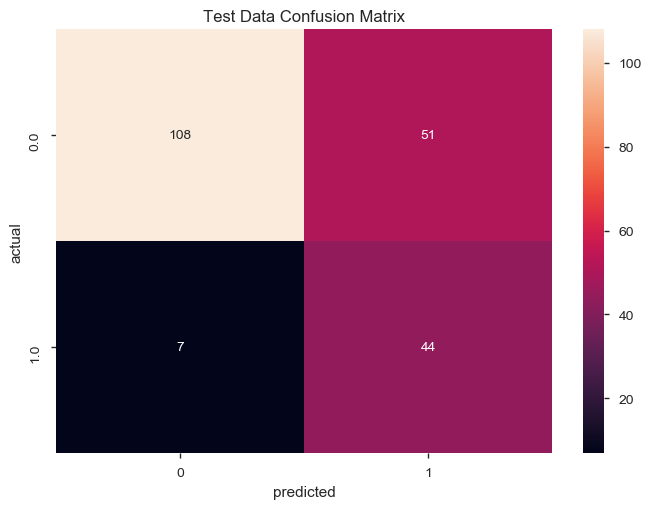

In [115]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.244898 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.244898 else 0)
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [116]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

('The overall accuracy score for the Train Data is : ', 0.7448979591836735)
('The overall accuracy score for the Test Data  is : ', 0.7238095238095238)


In [118]:
#gini value comparision
train_gini = 2*metrics.roc_auc_score(train_x['default'], logreg.predict(train_x)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_x['default'], logreg.predict(test_x)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

('The Gini Index for the model built on the Train Data is : ', 0.7013712544438802)
('The Gini Index for the model built on the Test Data is : ', 0.7319028240226908)


In [134]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)
train_predict.head()

,actual,prob,predicted,Deciles
450,0.0,0.000479,0,0
374,0.0,0.000826,0,0
292,0.0,0.001171,0,0
478,0.0,0.001208,0,0
562,0.0,0.001437,0,0


In [135]:
df = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)
df.head()

,Deciles,actual
Deciles,,
9,441,42.0
8,392,25.0
7,343,20.0
6,294,17.0
5,245,14.0


In [136]:
train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)

,Deciles,actual
Deciles,,
9,49,49
8,49,49
7,49,49
6,49,49
5,49,49
4,49,49
3,49,49
2,49,49
1,49,49
